# Exploratory Data Analysis Project

## BLACK FRIDAY SALES 

### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

##### IMPORT CSV FILE 

In [3]:
df = pd.read_csv('C:/sales.csv')

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


## DATA CLEANING 

In [4]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
#Check rows & Columns 
df.shape

(550068, 12)

In [6]:
#Checking outliers 
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
#Drop columns
df= df.drop(columns = ['Product_Category_1','Product_Category_2','Product_Category_3'])

In [20]:
#Check Nulls
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Purchase                      0
dtype: int64

In [13]:
#Check Dupliactes
df.duplicated().sum()

0

In [16]:
#Check value counts
df['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

In [4]:
#Transform column
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'married' if x == 1 else 'unmarried')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Purchase                    550068 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 37.8+ MB


## Exploratory Data Analysis 

### Univariate Analysis

The purpose of the univariate analysis is to understand the distribution of values for a single variable

## Gender 

In [9]:
Gender_distribution = df.groupby('Gender')[['Product_ID']].count().reset_index().rename(columns = {'Product_ID' : 'Total_purchased'})

In [7]:
Gender_distribution

,Gender,Total_purchased
0,F,135809
1,M,414259


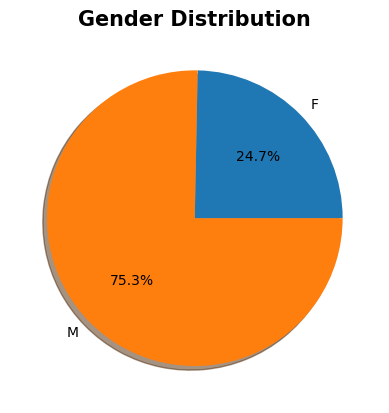

In [10]:
plt.pie(Gender_distribution ['Total_purchased'],labels=Gender_distribution['Gender'], autopct='%1.1f%%',shadow=True)
plt.title('Gender Distribution',fontsize=15, fontweight='bold')
plt.show()

## Age

In [42]:
Age_distribution = df.groupby('Age')[['Product_ID']].count().reset_index().rename(columns = {'Product_ID' : 'Total_Product_purchased'})

In [56]:
Age_distribution

,Age,Total_purchased
0,0-17,15102
1,18-25,99660
2,26-35,219587
3,36-45,110013
4,46-50,45701
5,51-55,38501
6,55+,21504


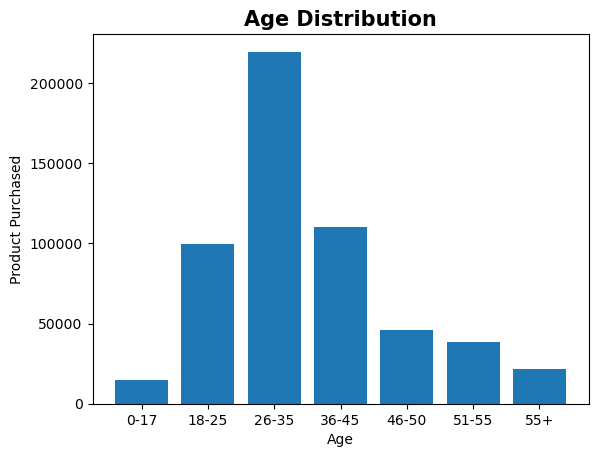

In [43]:
x = Age_distribution['Age']
y = Age_distribution['Total_Product_purchased']

plt.bar(x,y)
plt.title('Age Distribution',fontsize=15, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Product Purchased')
plt.show()

## City Category

In [57]:
City_distribution = df.groupby('City_Category')[['Product_ID']].count().reset_index().rename(columns = {'Product_ID' : 'Product_purchased'})

In [66]:
City_distribution

,City_Category,Product_purchased
0,A,147720
1,B,231173
2,C,171175


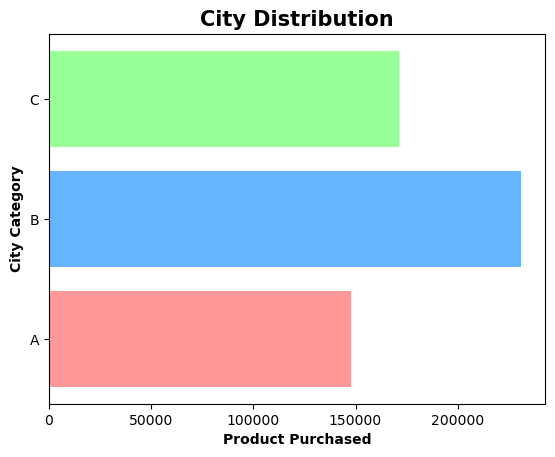

In [58]:
plt.barh(City_distribution['City_Category'], City_distribution['Product_purchased'], color=['#ff9999','#66b3ff','#99ff99'])
plt.xlabel('Product Purchased',fontweight='bold')
plt.ylabel('City Category',fontweight='bold')
plt.title('City Distribution',fontsize=15, fontweight='bold')
plt.show()

## Marital_Status

In [72]:
Marital_distribution = df.groupby('Marital_Status')[['Product_ID']].count().reset_index().rename(columns = {'Product_ID' : 'Product_purchased'})

In [73]:
Marital_distribution

,Marital_Status,Product_purchased
0,married,225337
1,unmarried,324731


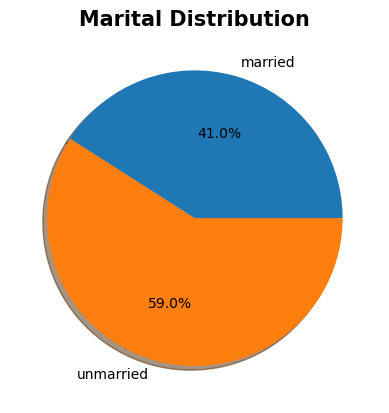

In [76]:
plt.pie(Marital_distribution['Product_purchased'],labels=Marital_distribution['Marital_Status'], autopct='%1.1f%%',shadow=True)
plt.title('Marital Distribution',fontsize=15, fontweight='bold')
plt.show()

# Bivariate Analysis

Bivariate analysis is the analysis of exactly two variables. We will use bivariate analysis to find relationships between two variables

## Gender & Stay_In_Current_City_Years

In [5]:
df1 = df.groupby(['Gender','Stay_In_Current_City_Years'])[['Product_ID']].count().reset_index().rename(columns = {'Product_ID' : 'Total_purchased'})

In [16]:
df1

,Gender,Stay_In_Current_City_Years,Total_purchased
0,F,0,17063
1,F,1,51298
2,F,2,24332
3,F,3,24520
4,F,4+,18596
5,M,0,57335
6,M,1,142523
7,M,2,77506
8,M,3,70765
9,M,4+,66130


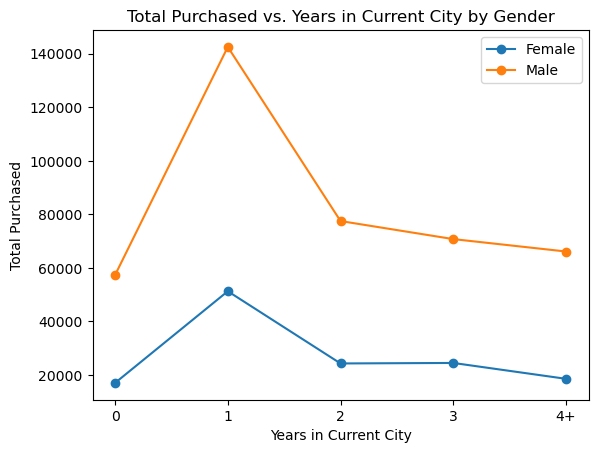

In [49]:
fig, ax = plt.subplots()

f_data = df1[df1['Gender'] == 'F']
m_data = df1[df1['Gender'] == 'M']

ax.plot(f_data['Stay_In_Current_City_Years'], f_data['Total_purchased'], label='Female', marker='o')
ax.plot(m_data['Stay_In_Current_City_Years'], m_data['Total_purchased'], label='Male', marker='o')

ax.set_xlabel('Years in Current City')
ax.set_ylabel('Total Purchased')
ax.set_title('Total Purchased vs. Years in Current City by Gender')
ax.legend()

plt.show()


## Marital_Status & Stay_In_Current_City_Years

In [19]:
df_new = df.groupby(['Marital_Status','Stay_In_Current_City_Years'])[['Product_ID']].count().reset_index().rename(columns = {'Product_ID' : 'Total_purchased'})

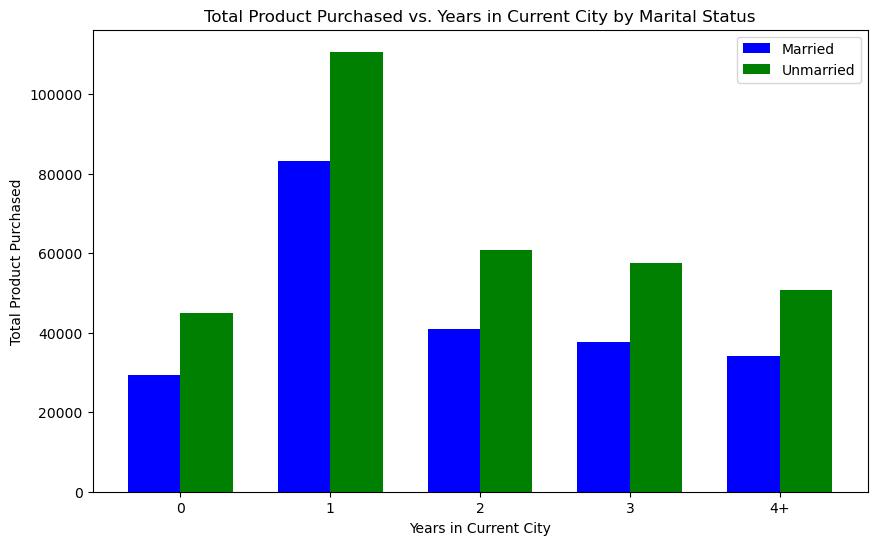

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(df_new['Stay_In_Current_City_Years'].unique()))

bar1 = ax.bar([i - bar_width/2 for i in index], df_new[df_new['Marital_Status'] == 'married']['Total_purchased'], bar_width, label='Married', color='blue')
bar2 = ax.bar([i + bar_width/2 for i in index], df_new[df_new['Marital_Status'] == 'unmarried']['Total_purchased'], bar_width, label='Unmarried', color='green')

ax.set_xlabel('Years in Current City')
ax.set_ylabel('Total Product Purchased')
ax.set_title('Total Product Purchased vs. Years in Current City by Marital Status')
ax.set_xticks(index)
ax.set_xticklabels(df_new['Stay_In_Current_City_Years'].unique())
ax.legend()

plt.show()

## Age & Marital_Status

In [22]:
df2 = df.groupby(['Marital_Status','Age'])[['Product_ID']].count().reset_index().rename(columns = {'Product_ID' : 'Total_purchased'})

In [23]:
df2

,Marital_Status,Age,Total_purchased
0,married,18-25,21116
1,married,26-35,86291
2,married,36-45,43636
3,married,46-50,33011
4,married,51-55,27662
5,married,55+,13621
6,unmarried,0-17,15102
7,unmarried,18-25,78544
8,unmarried,26-35,133296
9,unmarried,36-45,66377


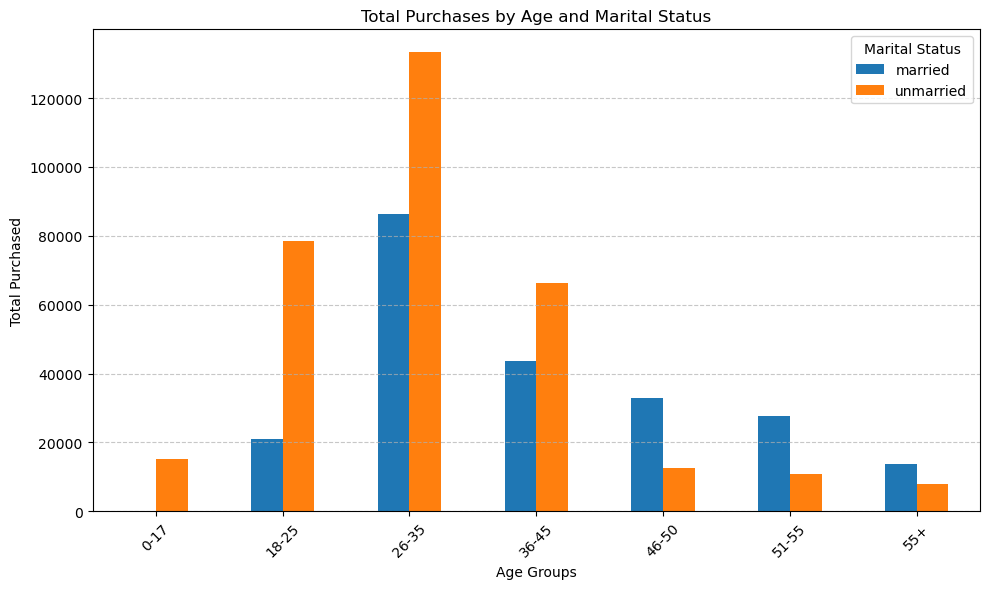

In [31]:
pivot_df = df2.pivot(index='Age', columns='Marital_Status', values='Total_purchased')

pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Total Purchases by Age and Marital Status')
plt.xlabel('Age Groups')
plt.ylabel('Total Purchased')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Gender & City 

In [61]:
gender_and_city = df.groupby(['Gender','City_Category'])[['Purchase']].sum().reset_index().rename(columns = {'Purchase' : 'Total_spend'})

In [62]:
gender_and_city

,Gender,City_Category,Total_spend
0,F,A,306329915
1,F,B,493617008
2,F,C,386285719
3,M,A,1010141746
4,M,B,1621916597
5,M,C,1277521757


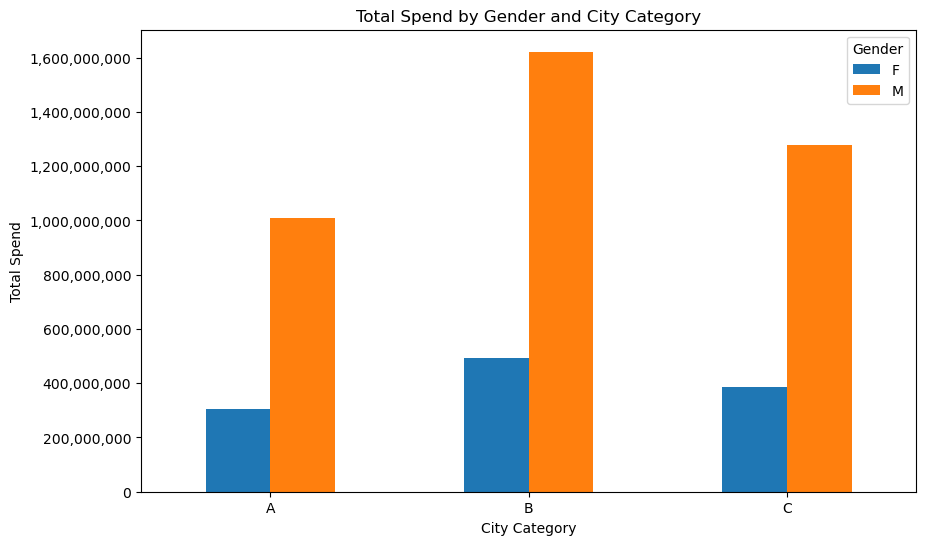

In [64]:
pivot_df = gender_and_city.pivot(index='City_Category', columns='Gender', values='Total_spend')


pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Total Spend by Gender and City Category')
plt.xlabel('City Category')
plt.ylabel('Total Spend')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.ticklabel_format(style='plain', axis='y') 
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

## Gender & Marital_Status

In [65]:
gender_and_Marital_Status = df.groupby(['Gender','Marital_Status'])[['Purchase']].sum().reset_index().rename(columns = {'Purchase' : 'Total_spend'})

In [66]:
gender_and_Marital_Status

,Gender,Marital_Status,Total_spend
0,F,married,502078515
1,F,unmarried,684154127
2,M,married,1584806780
3,M,unmarried,2324773320


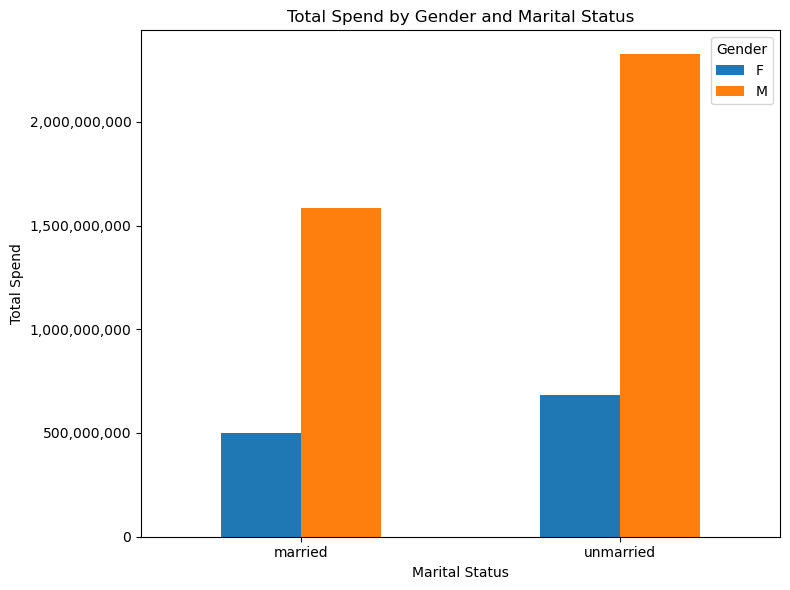

In [69]:
pivot_df = gender_and_Marital_Status.pivot(index='Marital_Status', columns='Gender', values='Total_spend')

pivot_df.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.xlabel('Marital Status')
plt.ylabel('Total Spend')
plt.title('Total Spend by Gender and Marital Status')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.ticklabel_format(style='plain', axis='y') 
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()
plt.show()

## Age VS Purchases

In [7]:
df_age = df.groupby('Age')[['Purchase']].sum().reset_index()

In [8]:
df_age

,Age,Purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


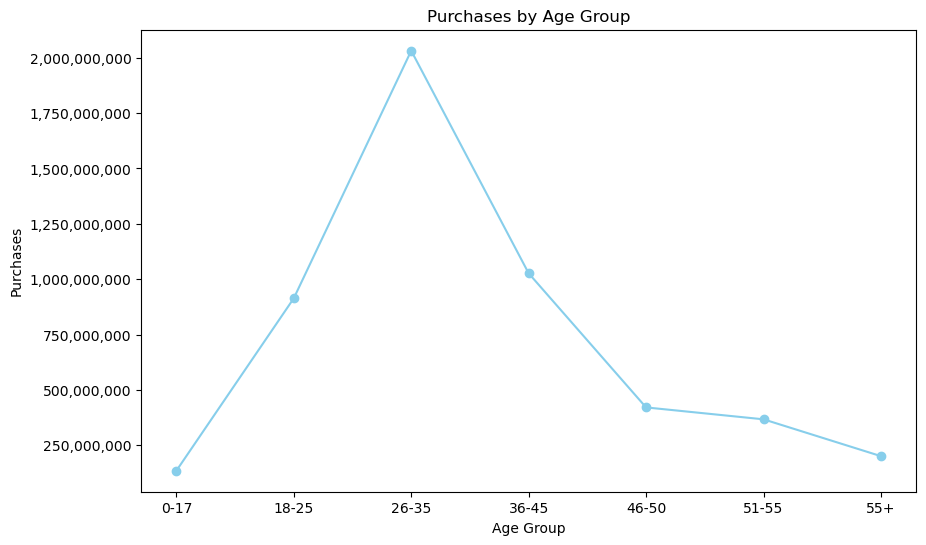

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df_age['Age'], df_age['Purchase'], marker='o', linestyle='-', color='skyblue')


plt.title('Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchases')
plt.ticklabel_format(style='plain', axis='y') 
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

## Years Vs Purchases

In [14]:
df_years = df.groupby('Stay_In_Current_City_Years')[['Purchase']].sum().reset_index()

In [15]:
df_years

,Stay_In_Current_City_Years,Purchase
0,0,682979229
1,1,1792872533
2,2,949173931
3,3,884902659
4,4+,785884390


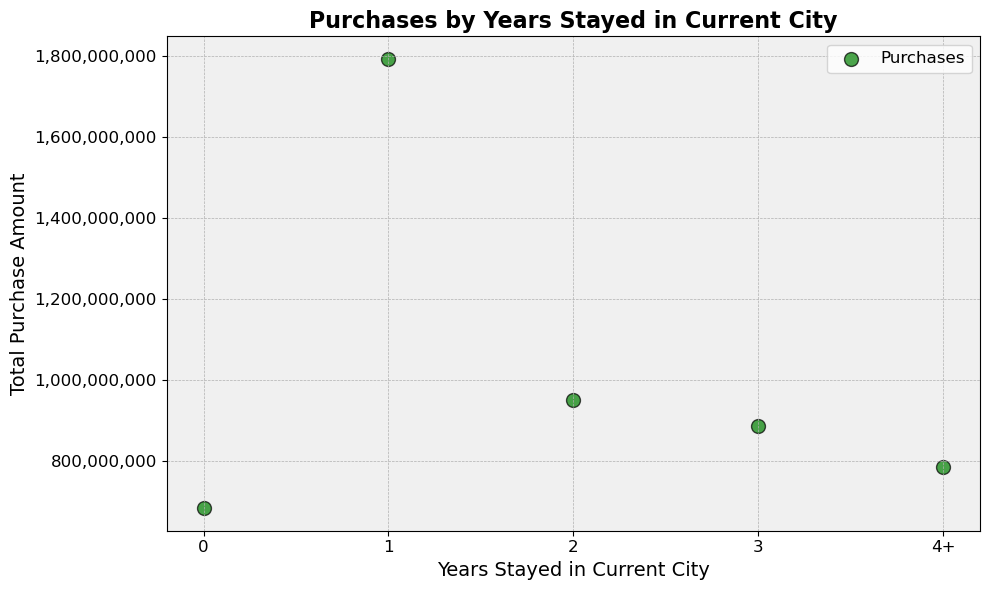

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df_years['Stay_In_Current_City_Years'], df_years['Purchase'], color='green', s=100, edgecolors='black', alpha=0.7)


plt.title('Purchases by Years Stayed in Current City', fontsize=16, fontweight='bold')
plt.xlabel('Years Stayed in Current City', fontsize=14)
plt.ylabel('Total Purchase Amount', fontsize=14)


plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ticklabel_format(style='plain', axis='y') 
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


plt.gca().set_facecolor('#f0f0f0')


plt.legend(['Purchases'], loc='upper right', fontsize=12)


plt.tight_layout()
plt.show()